In [197]:
import pandas as pd

In [198]:
df1 = pd.read_csv(r'C:\Users\Johannes\Documents\Uni\Master\Tech_Labs\ws24-skillswap\DS\01_Notebooks\01_Synthetic_Data_Set\Skillswap_Data_Labeled.csv')
pd.set_option('display.max_columns', None)

df1.head()

,First_Name,EMail,Age,Gender,Location_Preferences,Latitude,Longitude,Country,City,Languages_Preferred,Last_Seen,Response_Time,Farming_off,Fishery_off,Gardening_off,Pet grooming_off,Pet training_off,Drawing_off,Painting_off,Sculpture_off,Print making_off,Poetry_off,Make-up_off,Facials_off,Pedicure & Manicure_off,Hair care_off,Ballet_off,Tap dance_off,Jazz dance_off,Salsa_off,Ballroom dance_off,Piano_off,Guitar_off,Drumming_off,Trumpet_off,Composing_off,Script writing_off,Play writing_off,Poetry writing_off,Caligraphy_off,Blogging_off,Journalism_off,German_off,Spanish_off,Arabic_off,French_off,English_off,Nutrition_off,Fitness & Excercise_off,Wellness_off,Tennis_off,Football_off,Basketball_off,Yoga_off,Baseball_off,Gymnastic_off,Cooking_off,Baking_off,Grilling_off,Meal planning_off,Sautéing_off,Programming_off,Graphic design_off,Data Analysis_off,Photoshop_off,Social Media_off,Camera handling_off,Photo editing_off,Lighting_off,Landscape photography_off,Portrait photography_off,Image processing_off,Video editing_off,Film making_off,Animation_off,Motion graphics_off,Visual effects_off,Farming_dem,Fishery_dem,Gardening_dem,Pet grooming_dem,Pet training_dem,Drawing_dem,Painting_dem,Sculpture_dem,Print making_dem,Poetry_dem,Make-up_dem,Facials_dem,Pedicure & Manicure_dem,Hair care_dem,Ballet_dem,Tap dance_dem,Jazz dance_dem,Salsa_dem,Ballroom dance_dem,Piano_dem,Guitar_dem,Drumming_dem,Trumpet_dem,Composing_dem,Script writing_dem,Play writing_dem,Poetry writing_dem,Caligraphy_dem,Blogging_dem,Journalism_dem,German_dem,Spanish_dem,Arabic_dem,French_dem,English_dem,Nutrition_dem,Fitness & Excercise_dem,Wellness_dem,Tennis_dem,Football_dem,Basketball_dem,Yoga_dem,Baseball_dem,Gymnastic_dem,Cooking_dem,Baking_dem,Grilling_dem,Meal planning_dem,Sautéing_dem,Programming_dem,Graphic design_dem,Data Analysis_dem,Photoshop_dem,Social Media_dem,Camera handling_dem,Photo editing_dem,Lighting_dem,Landscape photography_dem,Portrait photography_dem,Image processing_dem,Video editing_dem,Film making_dem,Animation_dem,Motion graphics_dem,Visual effects_dem,Count_Farming_off,Count_Fishery_off,Count_Gardening_off,Count_Pet_grooming_off,Count_Pet_training_off,Count_Drawing_off,Count_Painting_off,Count_Sculpture_off,Count_Print_making_off,Count_Poetry_off,Count_Make_up_off,Count_Facials_off,Count_Pedicure_and_Manicure_off,Count_Hair_care_off,Count_Ballet_off,Count_Tap_dance_off,Count_Jazz_dance_off,Count_Salsa_off,Count_Ballroom_dance_off,Count_Piano_off,Count_Guitar_off,Count_Drumming_off,Count_Trumpet_off,Count_Composing_off,Count_Script_writing_off,Count_Play_writing_off,Count_Poetry_writing_off,Count_Caligraphy_off,Count_Blogging_off,Count_Journalism_off,Count_German_off,Count_Spanish_off,Count_Arabic_off,Count_French_off,Count_English_off,Count_Nutrition_off,Count_Fitness_and_Excercise_off,Count_Wellness_off,Count_Tennis_off,Count_Football_off,Count_Basketball_off,Count_Yoga_off,Count_Baseball_off,Count_Gymnastic_off,Count_Cooking_off,Count_Baking_off,Count_Grilling_off,Count_Meal_planning_off,Count_Sautéing_off,Count_Programming_off,Count_Graphic_design_off,Count_Data_Analysis_off,Count_Photoshop_off,Count_Social_Media_off,Count_Camera_handling_off,Count_Photo_editing_off,Count_Lighting_off,Count_Landscape_photography_off,Count_Portrait_photography_off,Count_Image_processing_off,Count_Video_editing_off,Count_Film_making_off,Count_Animation_off,Count_Motion_graphics_off,Count_Visual_effects_off,Count_Poetry writing_off,Count_Landscape photography_off,Count_Photo editing_off,Count_Motion graphics_off,Count_Social Media_off,Count_Hair care_off,Count_Film making_off,Count_Play writing_off,Count_Print making_off,Count_Visual effects_off,Count_Meal planning_off,Count_Data Analysis_off,Count_Video editing_off,Count_Fitness & Excercise_off,Count_Pet grooming_off,Count_Graphic design_off,Count_Pet training_off,Count_Pedicure & Manicure_off,Count_Jazz dance_off,Count_Camera handling_off,Count_Portrait photography_off,Count_Make-up_off,Count_Ballroom dance_o

# Goal: Get the 10 closest "Super Swaps": Matches where both parties can serve each others skill interests

# 1. Select a random user

In [199]:
# Select Random User and show the skill portfolio and the skill interests
random_row = df1.sample()

selected_columns = random_row[['First_Name', 'Latitude', 'Longitude', 'Location_Preferences', 'Activity_Status']]

off_columns = [col for col in df1.columns if col.endswith('_off') and not pd.isna(random_row[col].values[0])]
selected_off_columns = random_row[off_columns]
columns_to_drop = [col for col in selected_off_columns.columns if col.startswith("Count_")]
selected_off_columns.drop(columns=columns_to_drop, inplace=True)

dem_columns = [col for col in df1.columns if col.endswith('_dem') and random_row[col].values[0] != 0]
selected_dem_columns = random_row[dem_columns]

df2 = pd.concat([selected_columns, selected_off_columns, selected_dem_columns], axis=1)
df2

C:\Users\Johannes\AppData\Local\Temp\ipykernel_4860\3160578494.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_off_columns.drop(columns=columns_to_drop, inplace=True)


,First_Name,Latitude,Longitude,Location_Preferences,Activity_Status,Nutrition_off,Fitness & Excercise_off,Wellness_off,Make-up_dem,Facials_dem,Pedicure & Manicure_dem,Hair care_dem,German_dem,Spanish_dem,Arabic_dem,French_dem,English_dem,Cooking_dem,Baking_dem,Grilling_dem,Meal planning_dem,Sautéing_dem,Camera handling_dem,Photo editing_dem,Lighting_dem,Landscape photography_dem,Portrait photography_dem,Image processing_dem
173,Mariano,52.454185,13.627654,Local Only,Active User,Advanced,Expert,Novice,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


# 2. Find the right matches for the random user

## 2.1. Find the other users that offer skills the random user is interested in

In [200]:

# Step 1: Take the columns from df2 that end with "_dem"
df2_columns = [col for col in df2.columns if col.endswith('_dem')]

# Step 2: Replace the "_dem" with "_off"
df2_columns_off = [col.replace('_dem', '_off') for col in df2_columns]

# Step 3: Check if there are columns in the DataFrame df1 that match the names of the columns from step 2
matching_columns = [col for col in df1.columns if col in df2_columns_off]

# Step 4: Create a new DataFrame showing all rows where at least one of these columns has a value that is not NaN and exclude the row with the index of the rows in df2
selected_rows = df1[df1[matching_columns].notnull().any(axis=1) & ~df1.index.isin(df2.index)]


## 2.2 From the skill columns display only the columns that match the random user's interests and the random user's skill portfolio (indicating which skills the random user offers)

In [201]:
# Step 1: Select the required columns
selected_columns = ['First_Name', 'Latitude', 'Longitude', 'Location_Preferences', 'Activity_Status']

# Select columns ending with "_off" and not NaN
selected_off_columns = [col for col in selected_rows.columns if col.endswith('_off') and col in df2_columns_off and not selected_rows[col].isna().all()]

# Select columns ending with "_dem" and not "0" and match the offering of the random user
selected_rows_columns = [col for col in df2.columns if col.endswith('_off')]
selected_rows_columns_dem = [col.replace('_off', '_dem') for col in selected_rows_columns]

selected_dem_columns = [col for col in selected_rows.columns if col.endswith('_dem') and col in selected_rows_columns_dem and (selected_rows[col] != 0).any()]

# Add the selected columns to the list
selected_columns.extend(selected_off_columns)
selected_columns.extend(selected_dem_columns)

# Extract the required DataFrame with selected columns
potential_matches = selected_rows[selected_columns]
potential_matches.head()

,First_Name,Latitude,Longitude,Location_Preferences,Activity_Status,Make-up_off,Facials_off,Pedicure & Manicure_off,Hair care_off,German_off,Spanish_off,Arabic_off,French_off,English_off,Cooking_off,Baking_off,Grilling_off,Meal planning_off,Sautéing_off,Camera handling_off,Photo editing_off,Lighting_off,Landscape photography_off,Portrait photography_off,Image processing_off,Nutrition_dem,Fitness & Excercise_dem,Wellness_dem
1,Bianca,52.644114,13.648641,Remote Only,Inactive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Intermediate,Advanced,Intermediate,Expert,Novice,Expert,0,0,0
2,Adlan,52.531250,13.125491,Local or Remote,Active User,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Novice,Expert,Novice,Novice,Beginner,Intermediate,1,1,1
6,Mihrab,52.648858,13.342033,Remote Only,Swapper,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Novice,Intermediate,Expert,Beginner,Novice,Expert,0,0,0
8,Cláudio,52.532445,13.644201,Local or Remote,Swapper,Intermediate,Advanced,Novice,Expert,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0
11,Teresa,52.568812,13.309219,Local or Remote,Swapper,Advanced,Novice,Beginner,Intermediate,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0


## 2.3 Filter for the other users that are also interested in the skills the random user offers

In [202]:
Perfect_Matches = pd.DataFrame()

# Create an empty list to store rows for Perfect_Matches
perfect_matches_rows = []

# Create a list of all columns that contain the skill interests of the other users
potential_matches_columns = [col for col in potential_matches.columns if col.endswith('_dem')]

# Iterate over each row in potential_matches
for index, row in potential_matches.iterrows():
    # Check if all columns ending with "_dem" contain a 0
    if not all(row[col] == 0 for col in potential_matches_columns):
        # Store the original index in a column named "OG_Index"
        row['OG_Index'] = index
        # Include the remaining rows in the list for Perfect_Matches
        perfect_matches_rows.append(row)

# Create Perfect_Matches DataFrame from the collected rows
Perfect_Matches = pd.DataFrame(perfect_matches_rows)

# Reorder the columns to have "OG_Index" at the beginning
cols = Perfect_Matches.columns.tolist()
cols = ['OG_Index'] + [col for col in cols if col != 'OG_Index']
Perfect_Matches = Perfect_Matches[cols]

# Reset the index of Perfect_Matches
Perfect_Matches.reset_index(drop=True, inplace=True)
Perfect_Matches


,OG_Index,First_Name,Latitude,Longitude,Location_Preferences,Activity_Status,Make-up_off,Facials_off,Pedicure & Manicure_off,Hair care_off,German_off,Spanish_off,Arabic_off,French_off,English_off,Cooking_off,Baking_off,Grilling_off,Meal planning_off,Sautéing_off,Camera handling_off,Photo editing_off,Lighting_off,Landscape photography_off,Portrait photography_off,Image processing_off,Nutrition_dem,Fitness & Excercise_dem,Wellness_dem
0,2,Adlan,52.531250,13.125491,Local or Remote,Active User,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Novice,Expert,Novice,Novice,Beginner,Intermediate,1,1,1
1,35,Marko,52.428411,13.400757,Remote Only,Inactive,Expert,Beginner,Expert,Novice,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,1
2,78,Filomena,52.583096,13.730543,Local or Remote,Occasional User,NaN,NaN,NaN,NaN,Novice,Beginner,Expert,Intermediate,Intermediate,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,1
3,125,Maximiano,52.599572,13.499552,Remote Only,Inactive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Beginner,Beginner,Beginner,Expert,Beginner,NaN,NaN,NaN,NaN,NaN,NaN,1,1,1
4,126,Kieran,52.426184,13.390533,Remote Only,Swapper,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Intermediate,Expert,Intermediate,Beginner,Advanced,NaN,NaN,NaN,NaN,NaN,NaN,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,718,Fryderyk,52.608230,13.644770,Remote Only,Occasional User,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Beginner,Intermediate,Advanced,Novice,Novice,NaN,NaN,NaN,NaN,NaN,NaN,1,1,1
74,721,Neslinur,52.456135,13.584677,Remote Only,Occasional User,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Intermediate,Beginner,Intermediate,Novice,Expert,Beginner,1,1,1
75,740,Evangelista,52.415751,13.244006,Local or Remote,Swapper,Beginner,Expert,Beginner,Novice,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,1
76,743,Isaac,52.371812,13.303704,Local Only,Occasional User,Beginner,Intermediate,Novice,Expert,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,1


## 2.4 Get rid of inactive users & users that are not available for in-person meetings 

In [203]:
Perfect_Matches_filtered = Perfect_Matches[(Perfect_Matches['Activity_Status'] != 'Inactive') & (Perfect_Matches['Location_Preferences'] != 'Remote Only')]
Perfect_Matches_filtered.head()

,OG_Index,First_Name,Latitude,Longitude,Location_Preferences,Activity_Status,Make-up_off,Facials_off,Pedicure & Manicure_off,Hair care_off,German_off,Spanish_off,Arabic_off,French_off,English_off,Cooking_off,Baking_off,Grilling_off,Meal planning_off,Sautéing_off,Camera handling_off,Photo editing_off,Lighting_off,Landscape photography_off,Portrait photography_off,Image processing_off,Nutrition_dem,Fitness & Excercise_dem,Wellness_dem
0,2,Adlan,52.531250,13.125491,Local or Remote,Active User,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Novice,Expert,Novice,Novice,Beginner,Intermediate,1,1,1
2,78,Filomena,52.583096,13.730543,Local or Remote,Occasional User,NaN,NaN,NaN,NaN,Novice,Beginner,Expert,Intermediate,Intermediate,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,1
5,137,Maksymilian,52.545885,13.692279,Local or Remote,Swapper,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Novice,Beginner,Beginner,Novice,Novice,Advanced,1,1,1
6,152,Aleksander,52.652052,13.358615,Local or Remote,Active User,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Advanced,Advanced,Advanced,Advanced,Beginner,Novice,1,1,1
7,163,Konstanty,52.450718,13.289190,Local or Remote,Occasional User,NaN,NaN,NaN,NaN,Novice,Beginner,Beginner,Intermediate,Beginner,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,1


# 3. Plot the locations of users that would make perfect matches

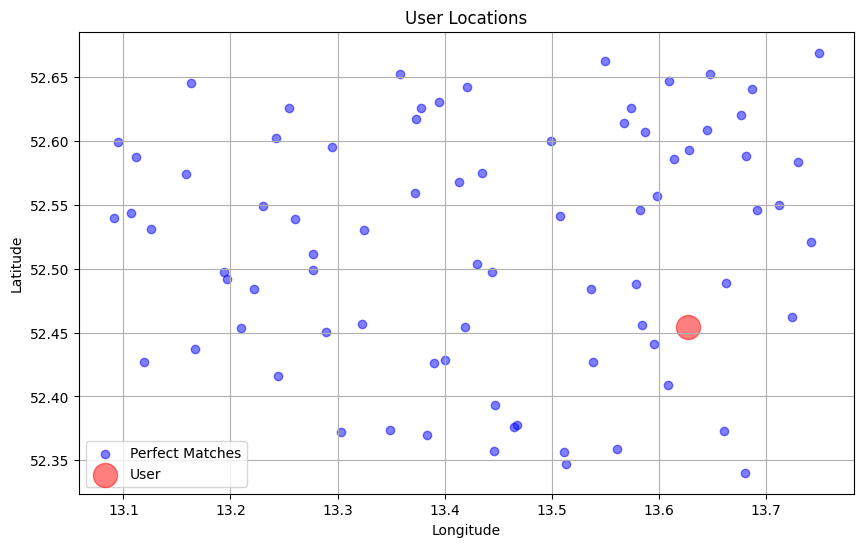

In [204]:
import matplotlib.pyplot as plt

# Plot Latitude vs Longitude for Perfect_Matches DataFrame
plt.figure(figsize=(10, 6))
plt.scatter(Perfect_Matches['Longitude'], Perfect_Matches['Latitude'], color='blue', alpha=0.5, label='Perfect Matches')

# Plot Latitude vs Longitude for df2 DataFrame
plt.scatter(df2['Longitude'], df2['Latitude'], color='red', alpha=0.5, label='User', s=300)

plt.title('User Locations')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.grid(True)
plt.show()


# 4. Get 10 closest matches

In [205]:
# Create one concatenated dataframe 

Match_Coordinates = Perfect_Matches_filtered.drop(columns=['OG_Index'])

concatenated_df = pd.concat([df2, Match_Coordinates])
concatenated_df.reset_index(drop=True, inplace=True)
concatenated_df.head()

,First_Name,Latitude,Longitude,Location_Preferences,Activity_Status,Nutrition_off,Fitness & Excercise_off,Wellness_off,Make-up_dem,Facials_dem,Pedicure & Manicure_dem,Hair care_dem,German_dem,Spanish_dem,Arabic_dem,French_dem,English_dem,Cooking_dem,Baking_dem,Grilling_dem,Meal planning_dem,Sautéing_dem,Camera handling_dem,Photo editing_dem,Lighting_dem,Landscape photography_dem,Portrait photography_dem,Image processing_dem,Make-up_off,Facials_off,Pedicure & Manicure_off,Hair care_off,German_off,Spanish_off,Arabic_off,French_off,English_off,Cooking_off,Baking_off,Grilling_off,Meal planning_off,Sautéing_off,Camera handling_off,Photo editing_off,Lighting_off,Landscape photography_off,Portrait photography_off,Image processing_off,Nutrition_dem,Fitness & Excercise_dem,Wellness_dem
0,Mariano,52.454185,13.627654,Local Only,Active User,Advanced,Expert,Novice,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Adlan,52.531250,13.125491,Local or Remote,Active User,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Novice,Expert,Novice,Novice,Beginner,Intermediate,1.0,1.0,1.0
2,Filomena,52.583096,13.730543,Local or Remote,Occasional User,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Novice,Beginner,Expert,Intermediate,Intermediate,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0
3,Maksymilian,52.545885,13.692279,Local or Remote,Swapper,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Novice,Beginner,Beginner,Novice,Novice,Advanced,1.0,1.0,1.0
4,Aleksander,52.652052,13.358615,Local or Remote,Active User,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Advanced,Advanced,Advanced,Advanced,Beginner,Novice,1.0,1.0,1.0


In [217]:
import numpy as np

# Function to calculate Euclidean distance
def euclidean_distance(point1, point2):
    return np.linalg.norm(point1 - point2)

# Take the first row of concatenated_df and extract the Latitude and Longitude
target_coordinate = concatenated_df[['Latitude', 'Longitude']].iloc[0]

# Calculate Euclidean distance for all rows in concatenated_df except the first row
distances = []
for index, row in concatenated_df.iloc[1:].iterrows():
    distance = euclidean_distance(row[['Latitude', 'Longitude']], target_coordinate)
    distances.append((index, distance))

# Sort distances
distances.sort(key=lambda x: x[1])

# Get the indices of the closest 10 points
closest_indices = [index for index, _ in distances[:10]]

# Extract the closest coordinates
closest_coordinates = concatenated_df.loc[closest_indices, ['Latitude', 'Longitude']]

# Step 1: Get the indices of closest_coordinates
# Step 2: Use the indices to locate the respective rows in concatenated_df
# Step 3: Extract the desired columns
# Step 4: Create a new DataFrame with the selected rows

closest_indices = closest_coordinates.index
selected_rows = concatenated_df.loc[closest_indices]
selected_rows_subset = selected_rows.iloc[:, :4]

selected_rows_subset

,First_Name,Latitude,Longitude,Location_Preferences
26,Hans Georg,52.441213,13.595270,Local or Remote
31,Odalys,52.409107,13.608345,Local or Remote
41,Santiago,52.488933,13.663047,Local or Remote
14,Luciano,52.488176,13.578517,Local or Remote
16,Gaspar,52.427221,13.538819,Local or Remote
38,Jean,52.483760,13.536920,Local or Remote
21,Almus,52.545600,13.582826,Local or Remote
13,Babett,52.556646,13.598501,Local or Remote
3,Maksymilian,52.545885,13.692279,Local or Remote
9,Giampiero,52.340260,13.681017,Local Only


In [212]:
selected_rows

,First_Name,Latitude,Longitude,Location_Preferences,Activity_Status,Nutrition_off,Fitness & Excercise_off,Wellness_off,Make-up_dem,Facials_dem,Pedicure & Manicure_dem,Hair care_dem,German_dem,Spanish_dem,Arabic_dem,French_dem,English_dem,Cooking_dem,Baking_dem,Grilling_dem,Meal planning_dem,Sautéing_dem,Camera handling_dem,Photo editing_dem,Lighting_dem,Landscape photography_dem,Portrait photography_dem,Image processing_dem,Make-up_off,Facials_off,Pedicure & Manicure_off,Hair care_off,German_off,Spanish_off,Arabic_off,French_off,English_off,Cooking_off,Baking_off,Grilling_off,Meal planning_off,Sautéing_off,Camera handling_off,Photo editing_off,Lighting_off,Landscape photography_off,Portrait photography_off,Image processing_off,Nutrition_dem,Fitness & Excercise_dem,Wellness_dem
26,Hans Georg,52.441213,13.595270,Local or Remote,Occasional User,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Novice,Expert,Expert,Advanced,Intermediate,Beginner,1.0,1.0,1.0
31,Odalys,52.409107,13.608345,Local or Remote,Active User,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Expert,Intermediate,Novice,Beginner,Expert,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0
41,Santiago,52.488933,13.663047,Local or Remote,Occasional User,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Advanced,Novice,Novice,Expert,Novice,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0
14,Luciano,52.488176,13.578517,Local or Remote,Swapper,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Intermediate,Advanced,Intermediate,Beginner,Novice,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0
16,Gaspar,52.427221,13.538819,Local or Remote,Active User,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Beginner,Advanced,Beginner,Expert,Intermediate,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0
38,Jean,52.483760,13.536920,Local or Remote,Occasional User,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Advanced,Beginner,Intermediate,Expert,Intermediate,Beginner,1.0,1.0,1.0
21,Almus,52.545600,13.582826,Local or Remote,Swapper,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Novice,Novice,Intermediate,Beginner,Novice,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0
13,Babett,52.556646,13.598501,Local or Remote,Active User,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Novice,Novice,Intermediate,Intermediate,Advanced,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0
3,Maksymilian,52.545885,13.692279,Local or Remote,Swapper,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Novice,Beginner,Beginner,Novice,Novice,Advanced,1.0,1.0,1.0
9,Giampiero,52.340260,13.681017,Local Only,Occasional User,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Novice,Advanced,Novice,Advanced,Advanced,Novice,Intermediate,Expert,Beginner,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0


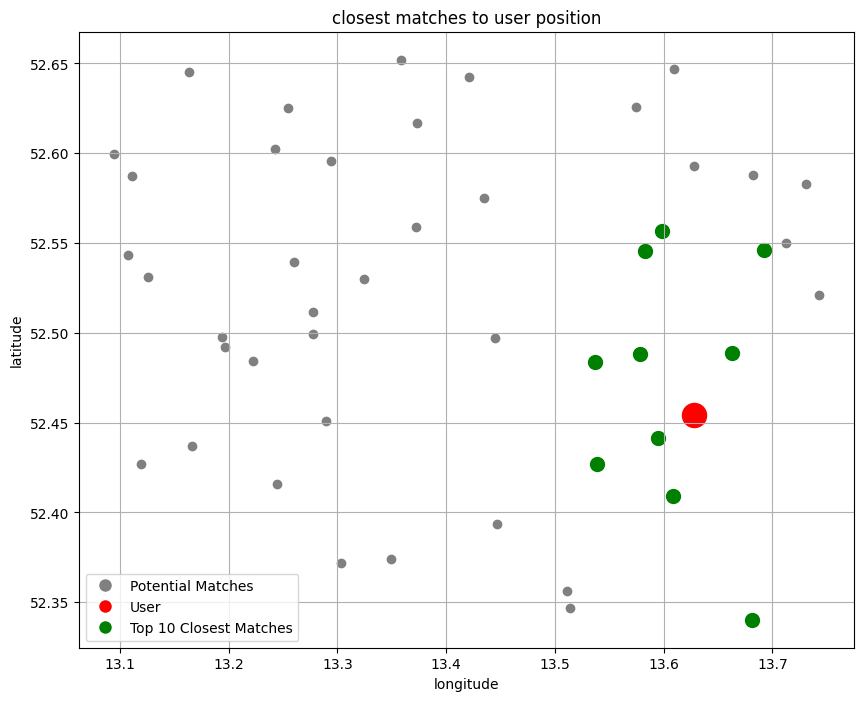

In [211]:
import matplotlib.pyplot as plt

# Plotting the data points
plt.figure(figsize=(10, 8))

# Plotting all data points in concatenated_df
plt.scatter(concatenated_df['Longitude'], concatenated_df['Latitude'], color='grey', label='All Data Points')

# Plotting the target coordinate (first row of concatenated_df)
plt.scatter(target_coordinate['Longitude'], target_coordinate['Latitude'], color='red', label='Target Coordinate', s=300)

# Plotting the closest coordinates to the target
plt.scatter(closest_coordinates['Longitude'], closest_coordinates['Latitude'], color='green', label='Closest Points', s=100)

# Adding labels and title
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.title('closest matches to user position')
# Create custom legend handles with the same size as the largest one
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', markersize=10, markerfacecolor='grey'),
                  plt.Line2D([0], [0], marker='o', color='w', markersize=10, markerfacecolor='red'),
                  plt.Line2D([0], [0], marker='o', color='w', markersize=10, markerfacecolor='green')]
plt.legend(legend_handles, ['Potential Matches', 'User', 'Top 10 Closest Matches'], handler_map={tuple: HandlerTuple(ndivide=None)})

plt.grid(True)

# Displaying the plot
plt.show()


In [208]:
import folium
from folium.plugins import HeatMap

# Create a base map centered around Berlin
berlin_map = folium.Map(location=[52.52, 13.405], zoom_start=12)

data_points = list(zip(concatenated_df['Latitude'], concatenated_df['Longitude']))

HeatMap(data_points).add_to(berlin_map)

folium.Marker(location=[target_coordinate['Latitude'], target_coordinate['Longitude']], popup='Your Position', icon=folium.Icon(color='red')).add_to(berlin_map)
for index, row in selected_rows_subset.iterrows():
    folium.Marker(location=[row['Latitude'], row['Longitude']], popup=f'{row["First_Name"]}', icon=folium.Icon(color='green')).add_to(berlin_map)

berlin_map